In [2]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt


In [3]:
csv_file = "../FormattedData/39.csv"
data = pd.read_csv(csv_file)

del data["Unnamed: 0"]

data.tail()

,new_date,BP1,BP2,Pulse,Temp,RR,O2Sat,Age_Number,Male,Female
1046850,855.0,115.0,40.0,67.0,-1.0,16.0,100.0,63,1,0
1046851,932.0,122.0,59.0,72.0,-1.0,16.0,95.0,63,1,0
1046852,1022.0,120.0,78.0,77.0,36.7,16.0,95.0,63,1,0
1046853,1308.0,157.0,82.0,64.0,36.5,15.0,94.0,63,1,0
1046854,1601.0,147.0,82.0,63.0,36.6,16.0,96.0,63,1,0


In [4]:
import matplotlib as mpl
mpl.use('agg')

from matplotlib.figure import Figure

def mpl_plot(avg, highlight):
    fig = Figure()
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Temp', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

def find_outliers2(variable='RR', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

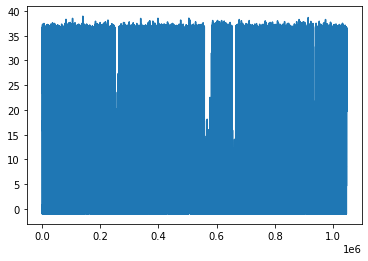

In [5]:
find_outliers(variable='Temp', window=20, sigma=10)


In [6]:
import panel as pn
pn.extension()

window = pn.widgets.IntSlider(name='window', value=30, start=1, end=60)
sigma = pn.widgets.IntSlider(name='sigma', value=10, start=0, end=20)

interactive = pn.bind(find_outliers, window=window, sigma=sigma)
interactive2 = pn.bind(find_outliers2, window=window, sigma=sigma)


In [7]:
first_app = pn.Column(window, sigma, interactive)
first_app

BokehModel(combine_events=True, render_bundle={'docs_json': {'f18ade83-7f57-4541-a9a9-f6842bdf5b7f': {'defs': …

In [8]:
second_app = pn.Column(window, sigma, interactive2)
second_app

BokehModel(combine_events=True, render_bundle={'docs_json': {'03da3e04-5025-4bf8-bd41-40f3d538e5d0': {'defs': …

In [12]:
first_app.extend(second_app)
first_app.show()